### This Notebook is a sort of Tutorial for the beginners in Machine Learning 

**upvote it if you like it and find it useful for you.  up vote will motivate me .** 

 **Thank You  **

 1. In this problem we have to use 30 different columns and we have to predict the Stage of Breast Cancer M (Malignant)  and B (Bengin)
 2. This analysis has been done using Basic Machine Learning Algorithm with detailed explanation
 3. This is good for beginners like as me Lets start.
 
4.Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

-3-32.Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g). concavity (severity of concave portions of the contour)

h). concave points (number of concave portions of the contour)

i). symmetry

j). fractal dimension ("coastline approximation" - 1)

5  here 3- 32 are divided into three parts first is Mean (3-13),  Stranded Error(13-23) and  Worst(23-32) and each contain 10 parameter (radius, texture,area, perimeter, smoothness,compactness,concavity,concave points,symmetry and fractal dimension) 

 6. Here Mean means the means of the all cells,  standard Error of all cell and worst means the worst  cell 

In [1]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Import data **

In [2]:
data = pd.read_csv("../input/data.csv",header=0)# here header 0 means the 0 th row is our coloumn 
                                                # header in data

In [3]:
# have a look at the data
print(data.head(2))# as u can see our data have imported and having 33 columns
# head is used for to see top 5 by default I used 2 so it will print 2 rows
# If we will use print(data.tail(2))# it will print last 2 rows in data

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33            184.6      2019.0            0.1622   
1     ...               23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0              

In [4]:
# now lets look at the type of data we have. We can use 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

*As I said I m beginner, so here I am explaining every thing in detail.

 1.So lets describe what these data type means, e.g 5 radius_mean 569 non-null float64 that means the radius_mean have 569 float type value.

2. Now we can see Unnamed:32 have 0 non null object it means the all values are null in this column so we cannot use this column for our analysis*

In [5]:
# now we can drop this column Unnamed: 32
data.drop("Unnamed: 32",axis=1,inplace=True) # in this process this will change in our data itself 
# if you want to save your old data then you can use below code
# data1=data.drop("Unnamed:32",axis=1)
# here axis 1 means we are droping the column

In [6]:
# here you can check the column has been droped
data.columns # this gives the column name which are persent in our data no Unnamed: 32 is not now there

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# like this we also don't want the Id column for our analysis
data.drop("id",axis=1,inplace=True)

In [8]:
# As I said above the data can be divided into three parts.lets divied the features according to their category
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [9]:
# lets now start with features_mean 
# now as ou know our diagnosis column is a object type so we can map it to integer value
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

## Explore the Data now

In [10]:
data.describe() # this will describe the all statistical function of our data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


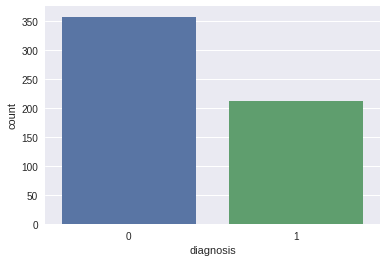

In [11]:
# lets get the frequency of cancer stages
sns.countplot(data['diagnosis'],label="Count")

In [12]:
# from this graph we can see that there is a more number of bengin stage of cancer which can be cure

## Data Analysis a little feature selection

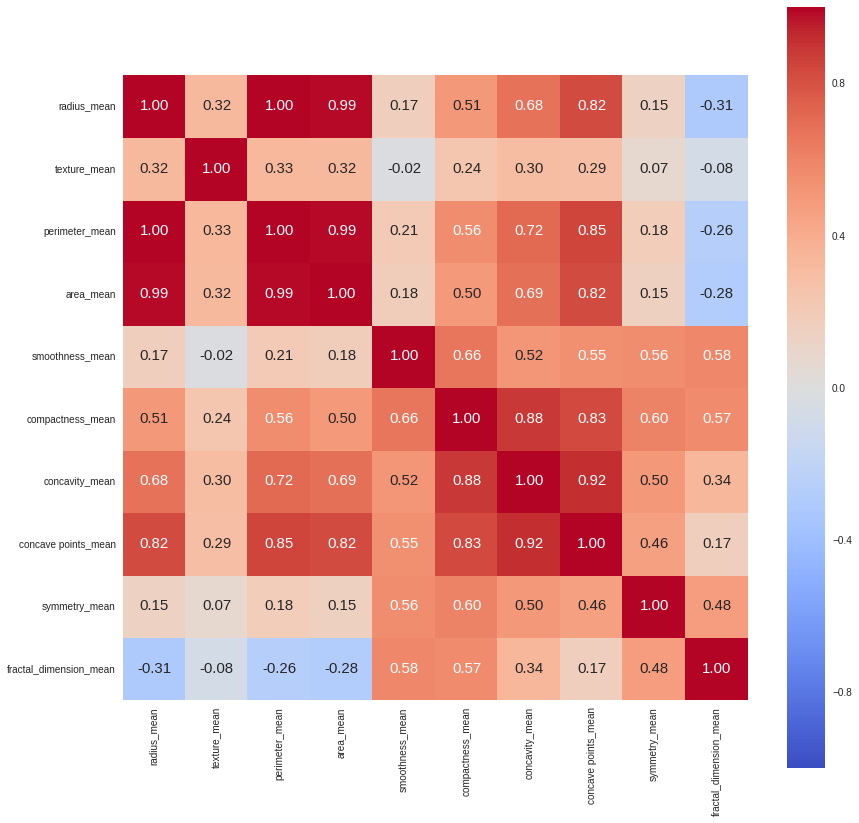

In [13]:
# now lets draw a correlation graph so that we can remove multi colinearity it means the columns are
# dependenig on each other so we should avoid it because what is the use of using same column twice
# lets check the correlation between features
# now we will do this analysis only for features_mean then we will do for others and will see who is doing best
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') # for more on heatmap you can visit Link(http://seaborn.pydata.org/generated/seaborn.heatmap.html)

*observation*

 - the radius, parameter and area  are highly correlated as expected from their relation*
    so from these we will use anyone of them *
 - *compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here *
 - so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean*

In [14]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
# now these are the variables which will use for prediction

In [15]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [16]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

In [17]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model

In [18]:
model.fit(train_X,train_y)# now fit our model for traiing data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs

In [20]:
metrics.accuracy_score(prediction,test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.91812865497076024

* Here the Accuracy for our model is 91 % which seems good*

In [21]:
# lets now try with SVM

In [22]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.85964912280701755

**SVM is giving only 0.85 which we can improve by using different techniques** 
**i will improve it till then beginners can understand how to model a data and they can have a overview of ML**

*Now lets do this for all feature_mean so that from Random forest we can get the feature which are important**

In [23]:
prediction_var = features_mean # taking all features

In [24]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [25]:
model=RandomForestClassifier(n_estimators=100)

In [26]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.95321637426900585

 - by taking all features accuracy increased but not so much so according to Razor's rule simpler method is better
 - by the way now lets check the importan features in the prediction

In [27]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

concave points_mean       0.255889
concavity_mean            0.191876
perimeter_mean            0.140212
radius_mean               0.133382
area_mean                 0.105065
texture_mean              0.072831
compactness_mean          0.039697
smoothness_mean           0.024103
symmetry_mean             0.019072
fractal_dimension_mean    0.017873
dtype: float64


In [28]:
# first lets do with SVM also using all features

In [29]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6900584795321637

In [30]:
# as you can see the accuracy of SVM decrease very much
# now lets take only top 5 important features given by RandomForest classifier

In [31]:
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']      

In [32]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [33]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.94152046783625731

In [34]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.76608187134502925

In [35]:
# so from this discussion we got multi colinearty effecting our SVM part a lot 
# but its not affecting so much randomforest because for random forest we dont need to make so much effort for our analysis part
# now lets do with the 3rd part of data which is worst
# first start with all features_worst

In [36]:
prediction_var = features_worst

In [37]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [38]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.67251461988304095

In [39]:
# but same problem With SVM, very much less accuray I think we have to tune its parameter
# that i will do later in intermidate part
#now we can get the important features from random forest now run Random Forest for it 

In [40]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.96491228070175439

In [41]:
# the accuracy for RandomForest invcrease it means the value are more catogrical in Worst part
#lets get the important features
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

perimeter_worst            0.274345
area_worst                 0.175700
concave points_worst       0.168601
radius_worst               0.148171
concavity_worst            0.089350
texture_worst              0.045125
compactness_worst          0.038830
smoothness_worst           0.026901
fractal_dimension_worst    0.016741
symmetry_worst             0.016236
dtype: float64


In [42]:
# same parameter but with great importance and here it seamed the only conacve points_worst is making 
# very important so it may be bias lets check only for top 5 important features

In [43]:
prediction_var = ['concave points_worst','radius_worst','area_worst','perimeter_worst','concavity_worst'] 

In [44]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [45]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.95321637426900585

In [46]:
#check for SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.69590643274853803

In [47]:
# now I think for simplicity the Randomforest will be better for prediction

In [48]:
# Now explore a little bit more
# now from features_mean i will try to find the variable which can be use for classify
# so lets plot a scatter plot for identify those variable who have a separable boundary between two class
#of cancer

In [49]:
# Lets start with the data analysis for features_mean
# Just try to understand which features can be used for prediction
# I will plot scatter plot for the all features_mean for both of diagnosis Category
# and from it we will find which are easily can used for differenciate between two category

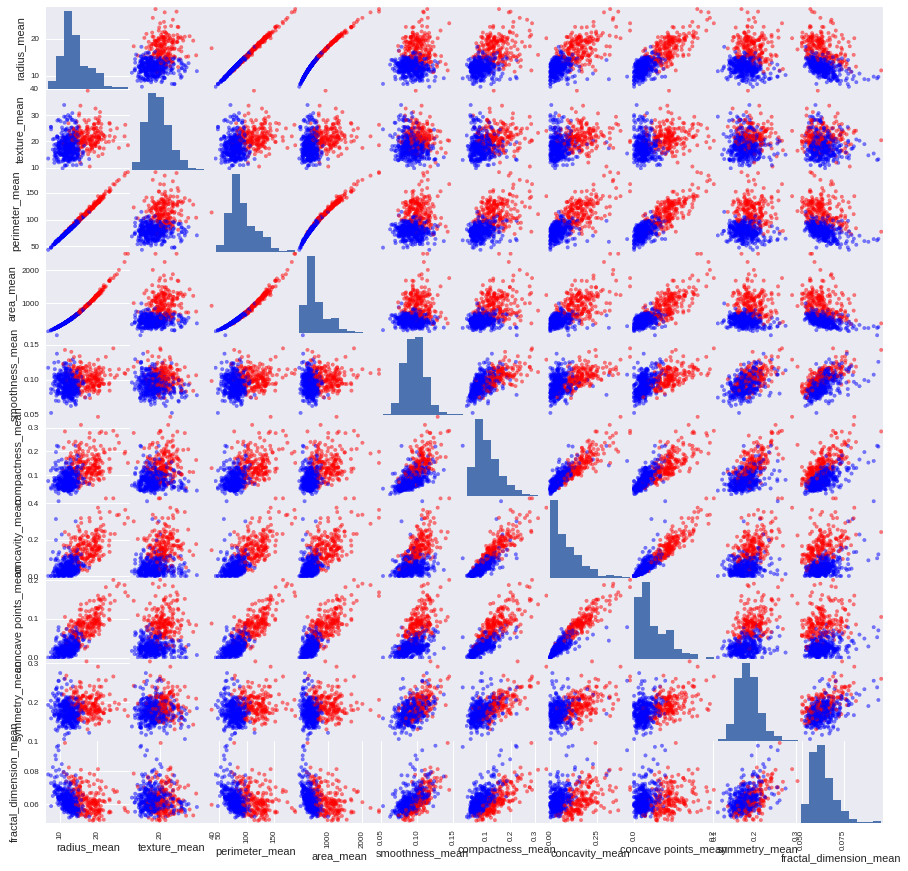

In [50]:
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

** Observation**

** 1. Radius, area and perimeter have a strong linear relationship as expected
     2 As graph shows the features like as texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean can t be used for classify two category because both category are mixed there is no separable plane
3. So we can remove them from our prediction_var**

In [51]:
# So predicton features will be 
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [52]:
# So predicton features will be 
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [53]:
# Now with these variable we will try to explore a liitle bit we will move to how to use cross validiation
# for a detail on cross validation use this link https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/

In [54]:
def model(model,data,prediction,outcome):
    # This function will be used for to check accuracy of different model
    # model is the m
    kf = KFold(data.shape[0], n_folds=10) # if you have refer the link then you must understand what is n_folds
    

In [55]:
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [56]:
# so those features who are capable of classify classe will be more useful

In [57]:
# so in this part i am going to explain about only some concept of machine learnig 
# here I will also compare the accuracy of different models
# I will First use cross validation with different model
# then I will explain about how to to tune the parameter of models using gridSearchCV 

In [58]:
# As we are going to use many models lets make a function
# Which we can use with different models
def classification_model(model,data,prediction_input,output):
    # here the model means the model 
    # data is used for the data 
    #prediction_input means the inputs used for prediction
    # output mean the value which are to be predicted
    # here we will try to find out the Accuarcy of model by using same data for fiiting and 
    #comparison for same data
    #Fit the model:
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
  
    #Make predictions on training set:
    predictions = model.predict(data[prediction_input])
  
    #Print accuracy
    # now checkin accuracy for same data
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(data.shape[0], n_folds=5)
    # About cross validitaion please follow this link
    #https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/
    #let me explain a little bit data.shape[0] means number of rows in data
    #n_folds is for number of folds
    error = []
    for train, test in kf:
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models 
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# in this iloc is used for index of trainig data
        # here iloc[train,:] means all row in train in kf amd the all columns
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    
    

In [59]:
# Now from Here start using different model

In [60]:
model = DecisionTreeClassifier()
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var= "diagnosis"
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 84.211%
Cross-Validation Score : 86.842%
Cross-Validation Score : 88.596%
Cross-Validation Score : 89.474%
Cross-Validation Score : 89.278%


**observation

 1. Accuracy is 100 % means over fitting 
 2. but cross validation scores are not good
 3 so accuracy cant be considered only factor here

In [61]:
# now move to svm

In [62]:
model = svm.SVC()

classification_model(model,data,prediction_var,outcome_var)

Accuracy : 96.661%
Cross-Validation Score : 56.140%
Cross-Validation Score : 65.789%
Cross-Validation Score : 69.883%
Cross-Validation Score : 72.807%
Cross-Validation Score : 74.706%


In [63]:
# I am facing problem with SVM dont know why?
#lets leave that we will try to do it later 

In [64]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 90.510%
Cross-Validation Score : 76.316%
Cross-Validation Score : 80.263%
Cross-Validation Score : 85.965%
Cross-Validation Score : 86.623%
Cross-Validation Score : 86.820%


In [65]:
# same here cross validation scores are not good
# now move to RandomForestclassifier
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 85.965%
Cross-Validation Score : 88.596%
Cross-Validation Score : 90.936%
Cross-Validation Score : 92.105%
Cross-Validation Score : 91.914%


In [66]:
# cross validation score are also not bed
# so Random forest is good
# lets try with logistic regression
model=LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 89.279%
Cross-Validation Score : 78.070%
Cross-Validation Score : 82.018%
Cross-Validation Score : 86.550%
Cross-Validation Score : 87.939%
Cross-Validation Score : 89.112%


** It was a detailed comparison of machine learning models 

 1. In next segment I will try to  explain the tuning of parameter for different models
 2. Then using those parameter we will try to forecast**

** Tuning Parameters  using grid search CV**

 *Lets Start with decision tree classifier
Tuning the parameters means using the best parameter for predict 
 there are many parameters need to model a Machine learning Algorithm
 for decision tree classifier refer this link [Link](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)*

In [67]:
data_X= data[prediction_var]
data_y= data["diagnosis"]

In [68]:
# lets Make a function for Grid Search CV
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    # this is how we use grid serch CV we are giving our model
    # the we gave parameters those we want to tune
    # Cv is for cross validation
    # scoring means to score the classifier
    
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    # this is the best score that we can achieve using these parameters#
    print(clf.best_score_)
    
    
    
    

In [69]:
# Here we have to take parameters that are used for Decison tree Classifier
# you will understand these terms once you follow the link above
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
# here our gridasearchCV will take all combinations of these parameter and apply it to model 
# and then it will find the best parameter for model
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)
# call our function

The best parameter found on development set is :
{'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 8}
the bset estimator is 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
The best score is 
0.942211055276


*observation*

 1. the score increase to 95 % 
 2. Seems to be good
 3. Lets do with KNN
 4. link for KNN  [Link](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 5. if you are a beginner please follow the link it will be very much useful

In [70]:
model = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'leaf_size': 1, 'n_neighbors': 3, 'weights': 'uniform'}
the bset estimator is 
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
The best score is 
0.914572864322


 1. Try with SVM
 2. [link](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [71]:
model=svm.SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'C': 1000, 'kernel': 'linear'}
the bset estimator is 
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The best score is 
0.93216080402


*observation*

 1. The SVM is working fine with good parameter it shows us what is the use of running of parameters
 2. In the first by using default  I was getting only 70 % accuracy
 3. But with tuned parameter it is 95 %

 1. Same we can do for Random Forest classifier
 2. I will not do that 
 3. if someone is using this as reference please do for Random Forest Classifier also

 1. The main objective of this notebook is to provide a hang on the the Machine learning methods
 2. I think it will be very useful for beginner because in this I have provided every thing that a beginner needs  most
 3. When I  was a beginner I face many problems finding these all so i tried to make everything available here 
 4. Thanks 